---
Selecting Data for analysis
---


**Description:**  
From the large dataset, we can select a small batch of image for quick analysis

### Additional Comments
### Author: Viswambhar Yasa

### Date: 09-01-2024

**Contact Information:**  
Email: [yasa.viswambhar@gmail.com](mailto:yasa.viswambhar@gmail.com)

In [11]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt


In [3]:
sys.path.insert(0, 'D:/Thesis/ExplainingWilderness/')
from sentinelmodels.preprocessing import SentinelDataset
from experiment.helper_functions import save_dict,load_dict

In [4]:
filename="./data/wilderness.pkl"
isExist = os.path.exists(filename)
if not isExist:
   os.makedirs(filename)

In [5]:
config={    
            "root_dir":r'D:/master-thesis/Dataset/anthroprotect',
            "datasplitfilename": r"infos.csv",
            "n_classes":2,
            "datasaved":True,
            "device":"cpu",
            "datasettype":"test",
            "filterclass":[1],
            }
csvfilepath=os.path.join(config["root_dir"],config["datasplitfilename"])
dataset = SentinelDataset(csvfilepath, config["root_dir"],output_channels=config["n_classes"],datasettype=config["datasettype"],filter_label=config["filterclass"],device=config["device"])
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

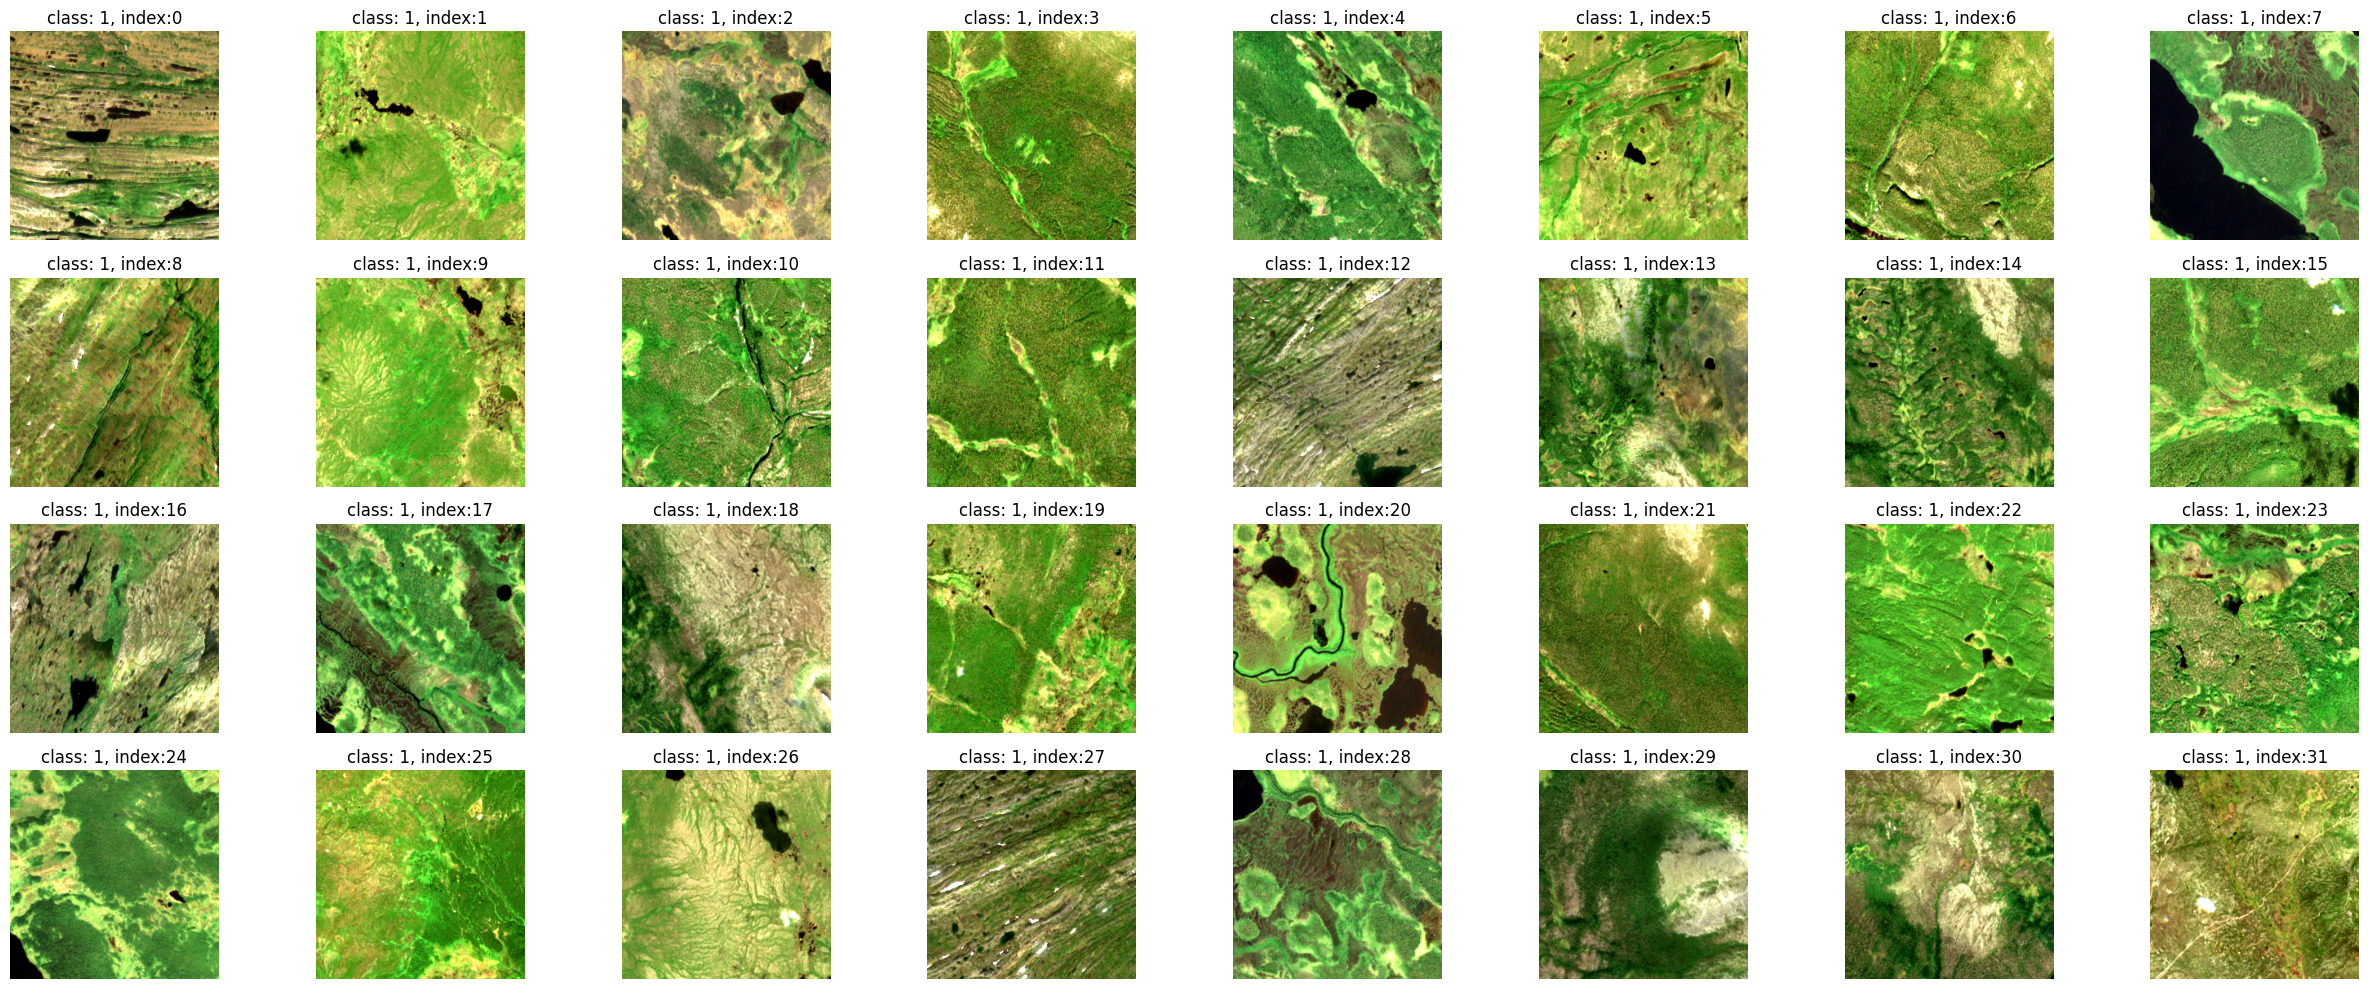

In [6]:
# Fetch a random batch
for images, labels in data_loader:
    random_batch_images, random_batch_labels = images, labels
    break

# Number of images in the batch
num_images = len(random_batch_images)

# Set up the matplotlib figure and axes
# The number of columns is half the number of images
# Adjust figsize to better fit your images
fig, axs = plt.subplots(4, int(num_images / 4), figsize=(25,10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate through the images and plot each one
for i in range(num_images):
    # Get the image and label
    image = random_batch_images[i].numpy().transpose(1, 2, 0)
    label = random_batch_labels[i]

    # Plot the image in the corresponding subplot
    axs[i].imshow(image)
    axs[i].set_title(f"class: {label}, index:{i}")
    axs[i].axis('off')  # Turn off axis

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [7]:
selectedindex=[3,11,15,25]

In [8]:
data_dict = {'images': images[selectedindex,:,:,:], 'labels': labels[selectedindex]}

In [9]:
dictfilepath="./data/wilderness_data.pkl"
save_dict(data_dict,dictfilepath)

In [10]:
wildernessdata=load_dict(dictfilepath)

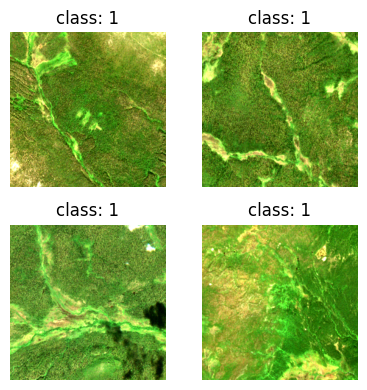

In [13]:
images = data_dict['images']
labels=  data_dict['labels']
num_images = len(images)

# Calculate the grid size for plotting
cols = int(np.sqrt(num_images))
rows = num_images // cols
rows += num_images % cols

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

# If there's only one image, axs might not be an array
if num_images == 1:
    axs = [axs]

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate through the images and plot each one
for i in range(num_images):
    # Get the image
    image = images[i].numpy().transpose(1, 2, 0)  # Adjust this based on your image format
    label= labels[i]
    # Plot the image in the corresponding subplot
    axs[i].imshow(image)
    axs[i].set_title(f"class: {label}")
    axs[i].axis('off')  # Turn off axis

# Adjust layout and show the plot
plt.tight_layout()
plt.show()